Equação diferencial:  Eq(x**2*Derivative(y(x), (x, 2)) + 2*x*Derivative(y(x), x), -500000.0*x**2*exp(-20.0*x))
Solução Geral:  Eq(y(x), C1 + C2/x - 1250.0*exp(-20.0*x) - 125.0*exp(-20.0*x)/x)
Solução Particular:  Eq(y(x), -0.0491456282003825*Tm - 87.7261197657027 - 1250.0*exp(-20.0*x) + (0.0519906147433525*Tm + 73.7337678745972)/x - 125.0*exp(-20.0*x)/x)
Tm:  1193.18787703226
Tc:  1186.71812351330


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in divide
  return -160.765756606246 - 1250.0*exp(-20.0*x) + 151.001589225623/x - 125.0*exp(-20.0*x)/x
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in subtract
  return -160.765756606246 - 1250.0*exp(-20.0*x) + 151.001589225623/x - 125.0*exp(-20.0*x)/x


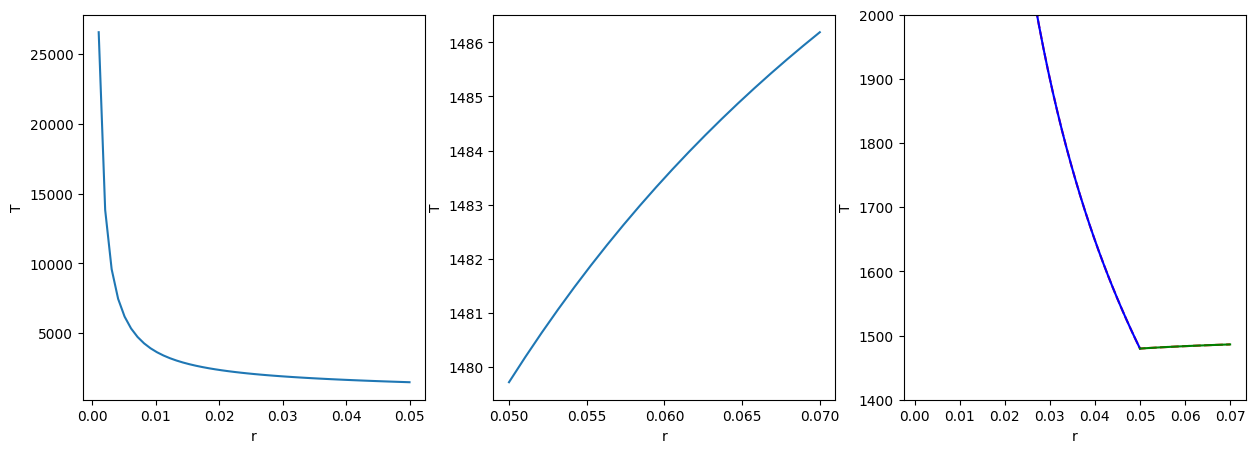

In [2]:
import matplotlib.pyplot as plt
from sympy import lambdify
import numpy as np
from sympy import Function, dsolve, Derivative, solve
from sympy.abc import x
from sympy import Eq, Derivative, Function, exp, Symbol, pi

y = Function("y")
dy = Derivative(y(x), x)
dy2 = Derivative(y(x), x, x)

g0 = 5e5
k_c = 1
k_m = 300
b = 1
x_c = 0.05
x_m = 0.07
h = 100

Tinf = 793

Tm = Symbol("Tm")
Tc = Tm + h / k_m * x_m * (Tm - Tinf) * (1 - x_m / x_c)
dTc = -h * x_m**2 * (Tm - Tinf) / (k_m * x_c**2 * pi * 4 * x_c**2)

eq1 = Eq(2 * x * dy + x**2 * dy2, -g0 * x**2 / k_c * exp(-b * x / x_c))
result = dsolve(eq1, y(x), ics={y(x_c): Tc, Derivative(y(x), x).subs(x, x_c): dTc})

print("Equação diferencial: ", eq1)
print("Solução Geral: ", dsolve(eq1, y(x)))
print("Solução Particular: ", result)

Tm_val = solve(Eq(result.rhs.subs(x, x_c), Tc), Tm)[0]
Tc_val = Tc.subs(Tm, Tm_val)

print("Tm: ", Tm_val - 293)
print("Tc: ", Tc_val - 293)

y_func = lambdify(x, result.rhs.subs(Tm, Tm_val), modules=["numpy"])
x_vals = np.linspace(0, x_c, 50)
y_vals = y_func(x_vals)

rev_x_vals = np.linspace(x_c, x_m, 20)
rev_y_vals = Tm_val + h * x_m * (Tm_val - Tinf) / k_m * (1 - x_m / rev_x_vals)

full_x_vals = np.concatenate((x_vals, rev_x_vals))
full_y_vals = np.concatenate((y_vals, rev_y_vals))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_vals, y_vals)
axs[0].set_xlabel("r")
axs[0].set_ylabel("T")

axs[1].plot(rev_x_vals, rev_y_vals)
axs[1].set_xlabel("r")
axs[1].set_ylabel("T")

axs[2].plot(full_x_vals, full_y_vals, "r--")
axs[2].plot(x_vals, y_vals, "b-")
axs[2].plot(rev_x_vals, rev_y_vals, "g-")
axs[2].set_xlabel("r")
axs[2].set_ylabel("T")
axs[2].set_ylim([1400, 2000])

plt.show()